In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('vaccination_all_tweets.csv')

# New section

In [ ]:
df.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites is_retweet  
0       0.0        0.0      False  
1       1.0        1.0      False  
2       0.0        0.0      False  
3     446.0     2129.0      False  
4       0.0        0.0      False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5059 non-null   int64  
 1   user_name         5059 non-null   object 
 2   user_location     3999 non-null   object 
 3   user_description  4736 non-null   object 
 4   user_created      5059 non-null   object 
 5   user_followers    5059 non-null   int64  
 6   user_friends      5059 non-null   int64  
 7   user_favourites   5059 non-null   int64  
 8   user_verified     5059 non-null   bool   
 9   date              5059 non-null   object 
 10  text              5059 non-null   object 
 11  hashtags          3769 non-null   object 
 12  source            5058 non-null   object 
 13  retweets          5058 non-null   float64
 14  favorites         5058 non-null   float64
 15  is_retweet        5058 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(9

In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       1060
user_description     323
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1290
source                 1
retweets               1
favorites              1
is_retweet             1
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

text
0  Same folks said daikon paste could treat a cyt...
1  While the world has been on the wrong side of ...
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3  Facts are immutable, Senator, even when you're...
4  Explain to me again why we need a vaccine @Bor...

In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5059 non-null   object
dtypes: object(1)
memory usage: 39.6+ KB


In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

text
0  folks said daikon paste could treat cytokine s...
1  world wrong side history year hopefully bigges...
2  coronavirus sputnikv astrazeneca pfizerbiontec...
3  facts immutable senator even youre ethically s...
4  explain need vaccine borisjohnson matthancock ...

In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 0 to 5058
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4867 non-null   object
dtypes: object(1)
memory usage: 76.0+ KB


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [ ]:
text_df.head(10)

text  polarity
0  folks said daikon paste could treat cytokine s...     0.000
1  world wrong side history year hopefully bigges...    -0.500
2  coronavirus sputnikv astrazeneca pfizerbiontec...     0.000
3  facts immutable senator even youre ethically s...     0.100
4  explain need vaccine borisjohnson matthancock ...     0.000
5  anyone useful adviceguidance whether covid vac...     0.400
6  bit sad claim fame success vaccination patriot...    -0.100
7  many bright days 2020 best 1 bidenharris winni...     0.675
8  covid vaccine getting covidvaccine covid19 pfi...     0.000
9  covidvaccine states start getting covid19vacci...     0.000

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

text  polarity sentiment
0  folks said daikon paste could treat cytokine s...       0.0   Neutral
1  world wrong side history year hopefully bigges...      -0.5  Negative
2  coronavirus sputnikv astrazeneca pfizerbiontec...       0.0   Neutral
3  facts immutable senator even youre ethically s...       0.1  Positive
4  explain need vaccine borisjohnson matthancock ...       0.0   Neutral

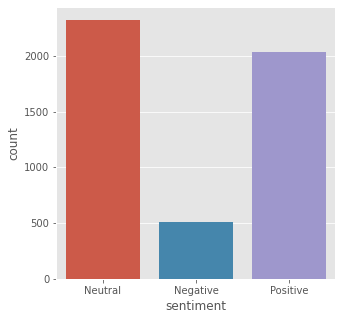

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

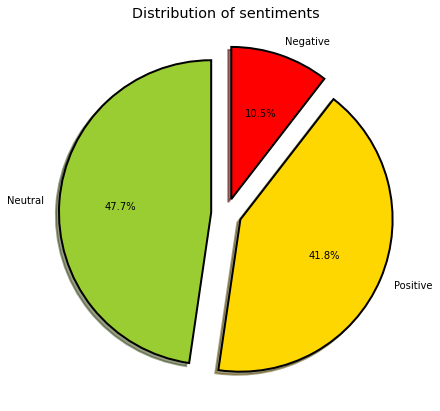

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

text  polarity sentiment
3992  1st vaccine jab done today efficiently done ex...       1.0  Positive
3788  saw awesome comparison pfizer vaccine vs moder...       1.0  Positive
4417  best feeling got covidvaccine lets keep going ...       1.0  Positive
2340  applying emotion pfizerbiontech based best evi...       1.0  Positive
3112  faheemyounus dear dr would like ask best windo...       1.0  Positive

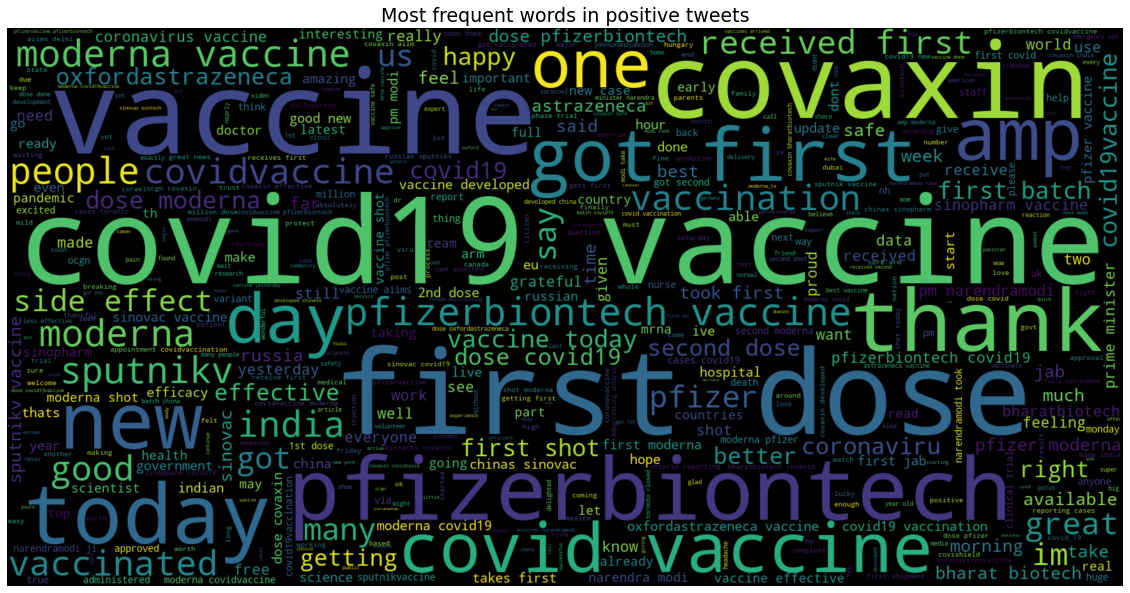

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text  polarity sentiment
2912  work skilled nursing facility got first vaccin... -0.003333  Negative
2073  ukgovernment cant even vaccinate properly ethi... -0.004762  Negative
2907  2015 worried absence mrna vaccine challenge wa... -0.006250  Negative
3894  mrna may change vaccine game person multiple s... -0.006250  Negative
4976  trishgreenhalgh im unfortunate sod tested posi... -0.007576  Negative

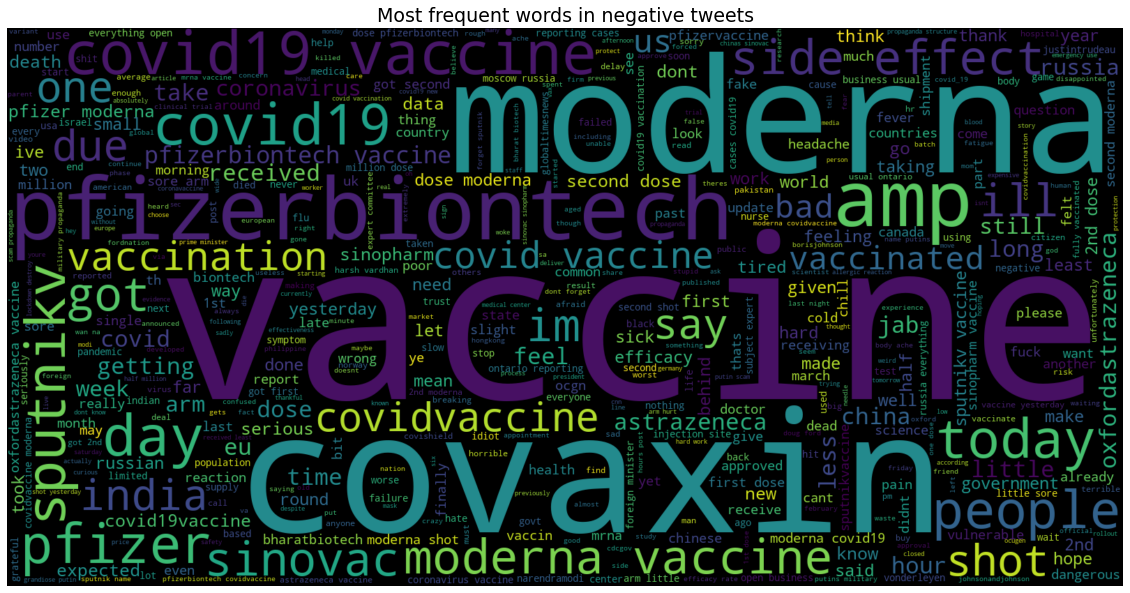

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

text  polarity sentiment
0     folks said daikon paste could treat cytokine s...       0.0   Neutral
3320  side effects socalled cure harmful virus moder...       0.0   Neutral
3365  today got vaccinated vaccinated pfizerbiontech...       0.0   Neutral
3367  48 hours since second pfizerbiontech vaccine s...       0.0   Neutral
3371  2nd dose rolling 2021 like queen covidvaccine ...       0.0   Neutral

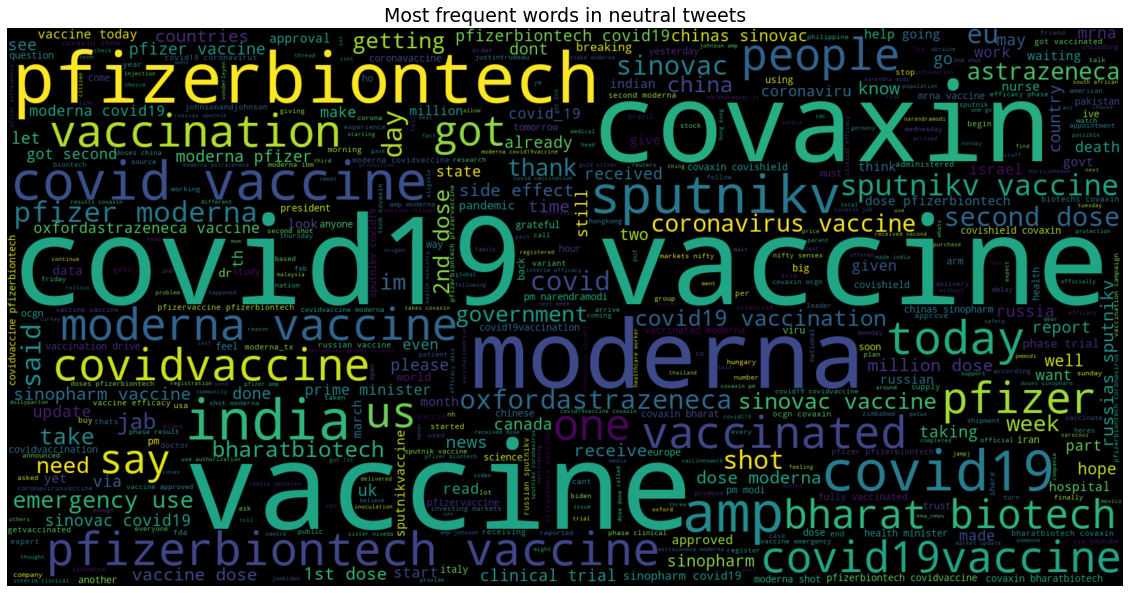

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 41306

First 20 features:
 ['000', '000 initial', '000 people', '004', '004 israelis', '02', '02 175', '02 adverse', '02012021', '02012021 grateful', '040120', '045', '045 ml', '045 pe', '05', '05 became', '08012021', '08012021 feeling', '09', '09 sodium']


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (3893, 41306)
Size of y_train: (3893,)
Size of x_test: (974, 41306)
Size of y_test: (974,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 79.88%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 19  66  25]
 [  0 435   5]
 [  1  99 324]]


              precision    recall  f1-score   support

    Negative       0.95      0.17      0.29       110
     Neutral       0.72      0.99      0.84       440
    Positive       0.92      0.76      0.83       424

    accuracy                           0.80       974
   macro avg       0.86      0.64      0.65       974
weighted avg       0.83      0.80      0.77       974



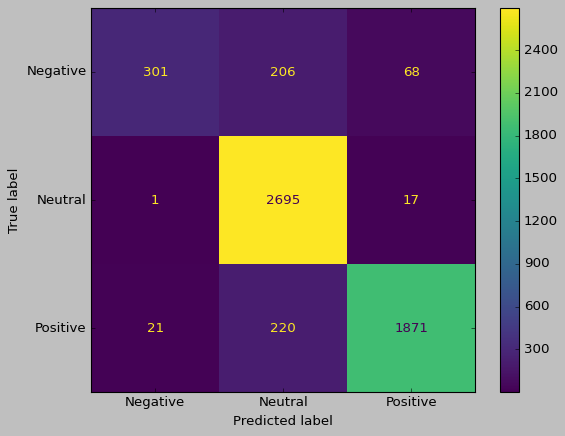

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 81.52%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 25  61  24]
 [  0 435   5]
 [  1  89 334]]


              precision    recall  f1-score   support

    Negative       0.96      0.23      0.37       110
     Neutral       0.74      0.99      0.85       440
    Positive       0.92      0.79      0.85       424

    accuracy                           0.82       974
   macro avg       0.88      0.67      0.69       974
weighted avg       0.85      0.82      0.79       974



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 82.03%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 30  56  24]
 [  3 431   6]
 [  3  83 338]]


              precision    recall  f1-score   support

    Negative       0.83      0.27      0.41       110
     Neutral       0.76      0.98      0.85       440
    Positive       0.92      0.80      0.85       424

    accuracy                           0.82       974
   macro avg       0.84      0.68      0.71       974
weighted avg       0.84      0.82      0.80       974



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 82.03%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 30  56  24]
 [  3 431   6]
 [  3  83 338]]


              precision    recall  f1-score   support

    Negative       0.83      0.27      0.41       110
     Neutral       0.76      0.98      0.85       440
    Positive       0.92      0.80      0.85       424

    accuracy                           0.82       974
   macro avg       0.84      0.68      0.71       974
weighted avg       0.84      0.82      0.80       974



Additional code to extract data form twitter using twitter api

In [ ]:
#NEW CODE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import re
import tweepy
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from tweepy.auth import OAuthHandler
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from textblob import *
from wordcloud import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing the keys from twitter api
bearer="AAAAAAAAAAAAAAAAAAAAAM%2FSbgEAAAAA5yJIK8gOdJxTNgAxleoWxzUIARo%3DY2EbYNbTEbfTT0zLd5Ln2K884lXiB63gcc4P3Q0pI2VZtyfJ9n"
consumerKey = "OfKvVZna3qyhTzCtvgGBurKfo"
consumerSecret = "yzUgAE31FaBSKG13g9CfeU9vWrNk7kZPagk6a1ScNyQHZDRppa"
accessToken = "1516235002383458306-WzxhekIf5uduHsU3CbqCBDfTDB4U3B"
accessTokenSecret = "vNHNAjdPdE217F0sodfFD5ifIR2QEQKuMGppgz2RYdQi2"

In [ ]:
#authenticateing the keys to access realtime data from twitter
authenticate = OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api=tweepy.API(authenticate, wait_on_rate_limit=True)


In [ ]:
#change screen name to change the tweet
posts = api.user_timeline(screen_name="srilanka", count=100, lang="en", tweet_mode="extended")
print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
    print(str(i)+')'+tweet.full_text+'\n')
    i=i+1

Show the 5 recent tweets: 

1)RT @NewsWireLK: "This is NOT a laughing matter" Sanath slams Basil Rajapaksa https://t.co/QaF9qkkz8p

2)🙏🏼 🇦🇺 https://t.co/8Tl7d1BGAQ

3)RT @ChayuDamsinghe: "According to the evader’s list compiled by the Inland Revenue Department (IRD), Bally’s Casino Colombo owned by Bally’…

4)🙏🏼 https://t.co/7iuae54cfC

5)RT @NewsWireLK: 50 days for "GotaGoGama" : Massive protest currently underway near Galle Face https://t.co/X345ebnbhF



In [ ]:
#Create a dataframe with a column called tweets and id
df=pd.DataFrame([i+1 for i in range(100)],columns=['id'])
df['tweet']=[tweet.full_text.lower() for tweet in posts]
#show the first 5 rows of data
df.head()

id                                              tweet
0   1  rt @newswirelk: 50 days for "gotagogama" : mas...
1   2  rt @jamz5251: rest in peace little ayesha! may...
2   3  මෙ ලස්සණ අතීතෙට යන්න හැමදාම ආසාවෙන් හිටියා නේද...
3   4  rt @basnayakem: video of mp sanath nishantha t...
4   5  rt @indubio_abstine: congratulations to our ne...

In [ ]:
#Remove_pattern function is used to remove the usernames, links and other special characters except hash tags
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
#Data clean the tweet column and create hash_tweet column with hashtags and tweets

# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
# remove links (https)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "https[\w]*")
# remove all characters except # and alphabets
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
# remove short words that do not affect the polarity
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(nltk.word_tokenize)
stop = stopwords.words('english')
tokenized_tweet=tokenized_tweet.apply(lambda x: [item for item in x if item not in stop])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet
df.head()


id                                              tweet  \
0   1  rt @newswirelk: 50 days for "gotagogama" : mas...   
1   2  rt @jamz5251: rest in peace little ayesha! may...   
2   3  මෙ ලස්සණ අතීතෙට යන්න හැමදාම ආසාවෙන් හිටියා නේද...   
3   4  rt @basnayakem: video of mp sanath nishantha t...   
4   5  rt @indubio_abstine: congratulations to our ne...   

                                         clean_tweet  
0  newswirelk days gotagogama massive protest cur...  
1  jamz rest peace little ayesha justice prevail ...  
2                                               xyhy  
3  basnayakem video sanath nishantha trying attac...  
4  indubio abstine congratulations minister trade...

In [ ]:
#func to plot the wordcloud graph
def graph(word):
    wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(word)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

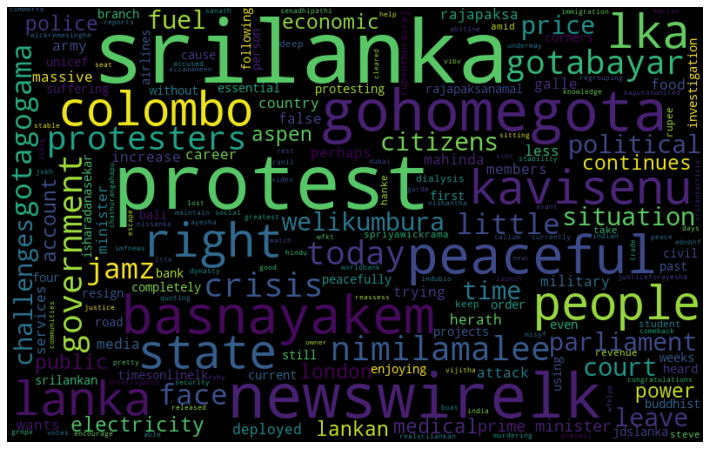

In [ ]:
#visualize the frequent word
all_words = " ".join([sentence for sentence in df['clean_tweet']])
graph(all_words)

In [ ]:
#FIND IF A TWEET IS NEGATIVE POSITIVE

#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#Create two columns subjectivity and polarity
df['Polarity']=df['clean_tweet'].apply(getPolarity)
#show the new dataframe
df.head()

id                                              tweet  \
0   1  rt @newswirelk: 50 days for "gotagogama" : mas...   
1   2  rt @jamz5251: rest in peace little ayesha! may...   
2   3  මෙ ලස්සණ අතීතෙට යන්න හැමදාම ආසාවෙන් හිටියා නේද...   
3   4  rt @basnayakem: video of mp sanath nishantha t...   
4   5  rt @indubio_abstine: congratulations to our ne...   

                                         clean_tweet  Polarity  
0  newswirelk days gotagogama massive protest cur...  0.033333  
1  jamz rest peace little ayesha justice prevail ... -0.187500  
2                                               xyhy  0.000000  
3  basnayakem video sanath nishantha trying attac...  0.033333  
4  indubio abstine congratulations minister trade...  0.000000

In [ ]:
#Use polarity column to analyse nature of tweets

#create a function to compute negative, neutral and positve analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'    
df['Analysis']=df['Polarity'].apply(getAnalysis)
#show the dataframe
df.head()

id                                              tweet  \
0   1  rt @newswirelk: 50 days for "gotagogama" : mas...   
1   2  rt @jamz5251: rest in peace little ayesha! may...   
2   3  මෙ ලස්සණ අතීතෙට යන්න හැමදාම ආසාවෙන් හිටියා නේද...   
3   4  rt @basnayakem: video of mp sanath nishantha t...   
4   5  rt @indubio_abstine: congratulations to our ne...   

                                         clean_tweet  Polarity  Analysis  
0  newswirelk days gotagogama massive protest cur...  0.033333  Positive  
1  jamz rest peace little ayesha justice prevail ... -0.187500  Negative  
2                                               xyhy  0.000000   Neutral  
3  basnayakem video sanath nishantha trying attac...  0.033333  Positive  
4  indubio abstine congratulations minister trade...  0.000000   Neutral

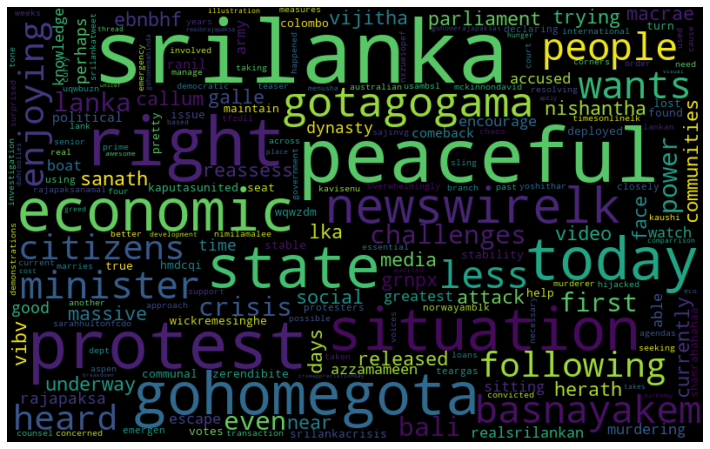

In [ ]:
pos_words = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Positive']])
# plot the graph
graph(pos_words)


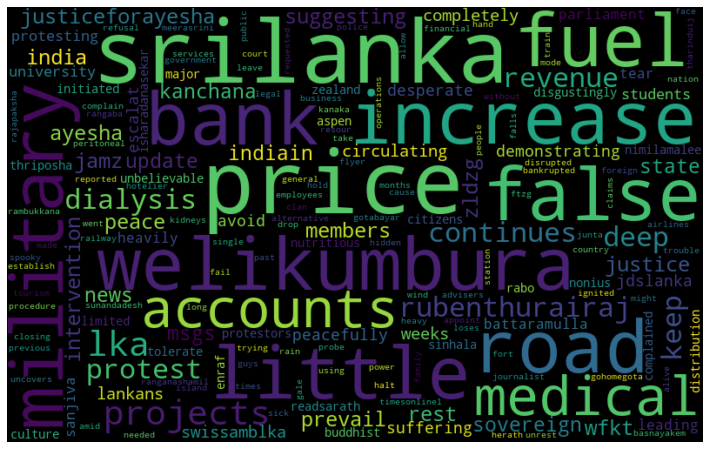

In [ ]:
# frequent words visualization for -ve
neg_words = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Negative']])
# plot the graph
graph(neg_words)

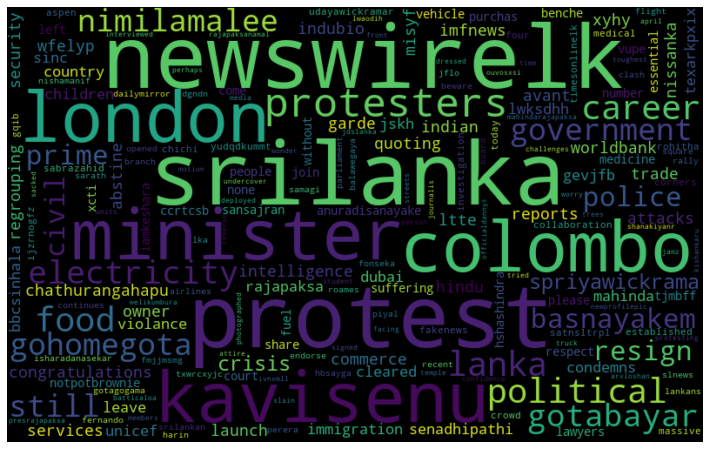

In [ ]:
# frequent words visualization for neutral
neu_words = " ".join([sentence for sentence in df['clean_tweet'][df['Analysis']=='Neutral']])
# plot the graph
graph(neu_words)

In [ ]:
#Find the percentage of each type of tweet
def percentage(vibe):
    pertweets= df[df.Analysis ==vibe]
    pertweets = pertweets['tweet']
    vibeval=round(pertweets.shape[0]/df.shape[0]*100,1)
    print(vibe,"Tweets:",end=" ")
    return vibeval

In [ ]:
#Print the percentage values
positive=percentage('Positive')
print(positive)
negative=percentage('Negative')
print(negative)
neutral=percentage('Neutral')
print(neutral)

Positive Tweets: 31.0
Negative Tweets: 18.0
Neutral Tweets: 51.0


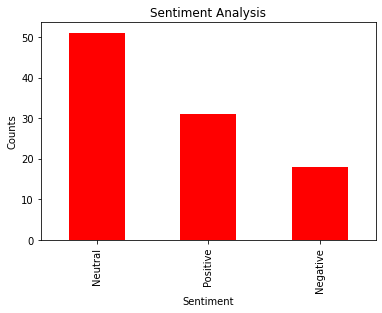

In [ ]:
#Plot the positive, neutral and negative tweets in a bar graph

#show the value counts
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar',color='red')
plt.show()

In [ ]:
#Exploratory Data Analysis using the hashtags

# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [ ]:
#Extracting hashtags from the hash_tweet considering analysis column

# extract hashtags from positive tweets
ht_positive = hashtag_extract(df['tweet'][df['Analysis']=='Positive'])

# extract hashtags from negative tweets
ht_negative = hashtag_extract(df['tweet'][df['Analysis']=='Negative'])

# extract hashtags from negative tweets
ht_neutral = hashtag_extract(df['tweet'][df['Analysis']=='Neutral'])

In [ ]:
# unnest list
#Remove the empty list items within the list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])
ht_positive[:5]  #checking any one of them to see the list

['lka', 'srilanka', 'srilanka', 'rajapaksa', 'srilankacrisis']

In [ ]:
#Function to plot the bargraph for top 10 hashtags along with the dataframe
def pdframe(vibe):
    freq = nltk.FreqDist(vibe)
    d = pd.DataFrame({'Hashtag': list(freq.keys()),'Count': list(freq.values())})  
    # select top 10 hashtags
    d = d.nlargest(columns='Count', n=10)
    plt.figure(figsize=(20,9))
    sns.barplot(data=d, x='Hashtag', y='Count')
    plt.show()  
    return d

Positive tweets based on hashtags


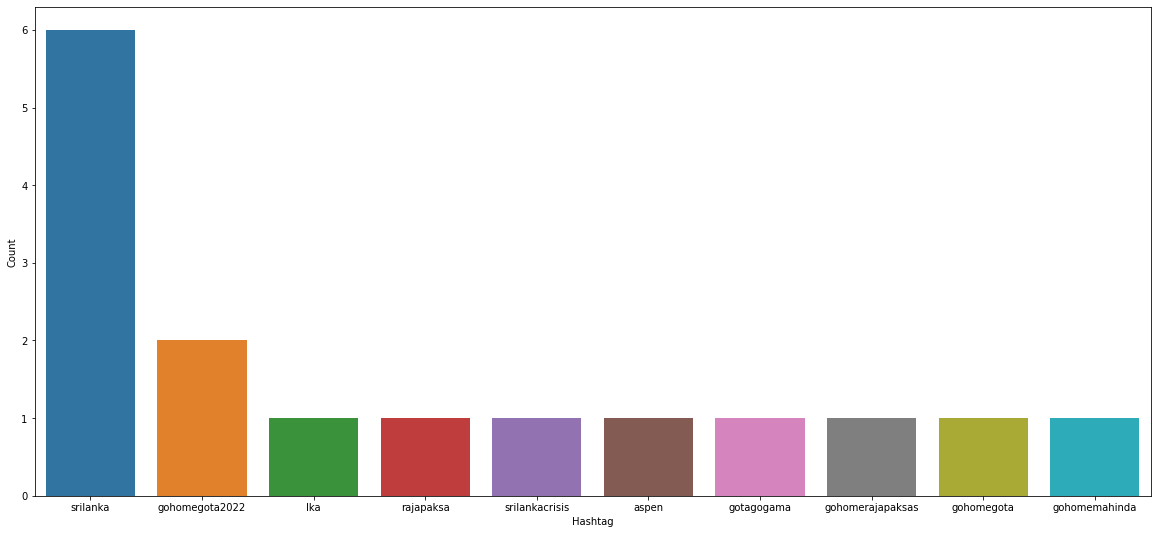

Hashtag  Count
1          srilanka      6
7    gohomegota2022      2
0               lka      1
2         rajapaksa      1
3    srilankacrisis      1
4             aspen      1
5        gotagogama      1
6  gohomerajapaksas      1
8        gohomegota      1
9     gohomemahinda      1

In [ ]:
#Plot for top 10 hash tags in positive tweets
print('Positive tweets based on hashtags')
freq_pos = pdframe(ht_positive)
freq_pos

Negative tweets based on hashtags


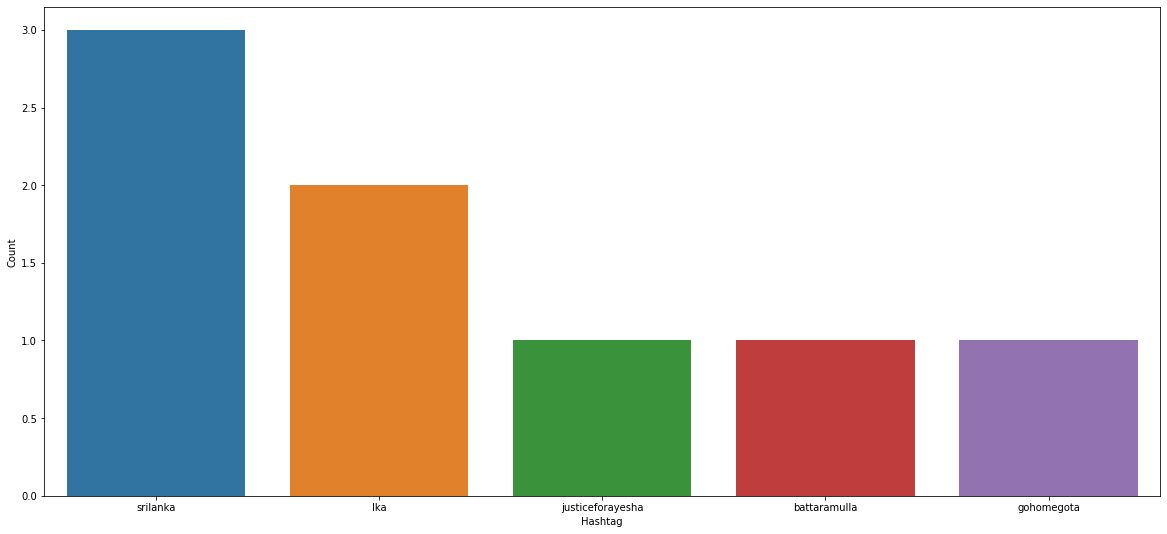

Hashtag  Count
1          srilanka      3
3               lka      2
0  justiceforayesha      1
2      battaramulla      1
4        gohomegota      1

In [ ]:
#Plot for top 10 hash tags in negative tweets
print('Negative tweets based on hashtags')
freq_neg = pdframe(ht_negative)
freq_neg

Neutral tweets based on hashtags


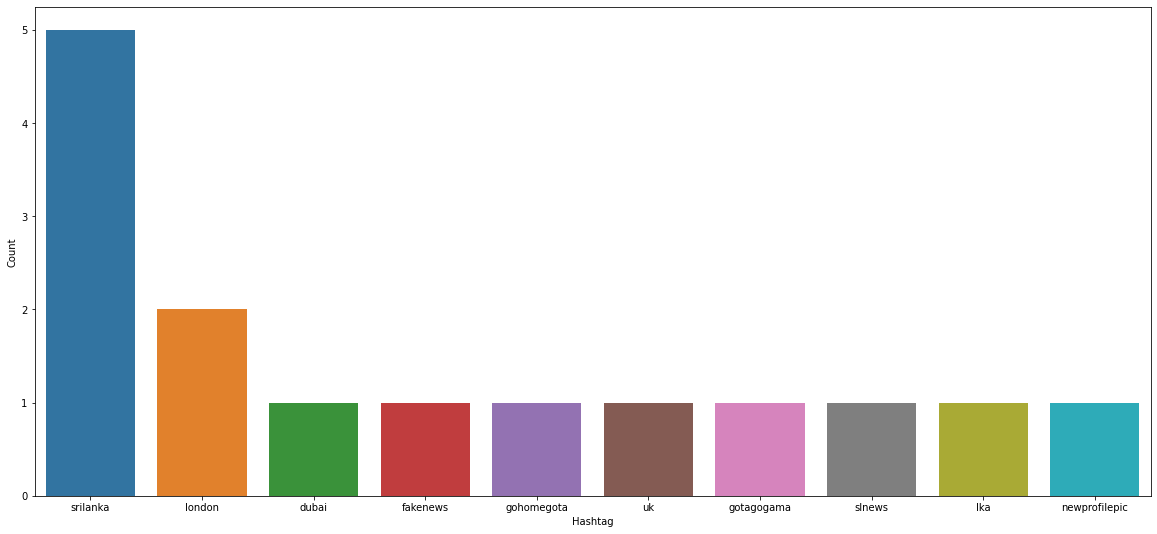

Hashtag  Count
1       srilanka      5
6         london      2
0          dubai      1
2       fakenews      1
3     gohomegota      1
4             uk      1
5     gotagogama      1
7         slnews      1
8            lka      1
9  newprofilepic      1

In [ ]:
#Plot for top 10 hash tags in neutral tweets
print('Neutral tweets based on hashtags')
freq_neu = pdframe(ht_neutral)
freq_neu